Iris DATASET FOR LOGISTIC REGRESSION !!!

Accuracy Score:  0.9
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.80      0.89      0.84         9
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Confusion Matrix: 
 [[10  0  0]
 [ 0  8  1]
 [ 0  2  9]]


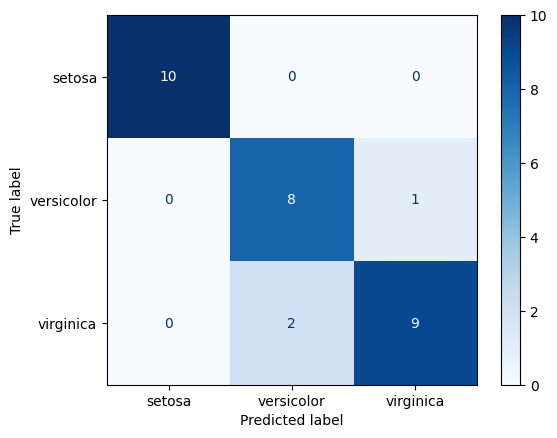

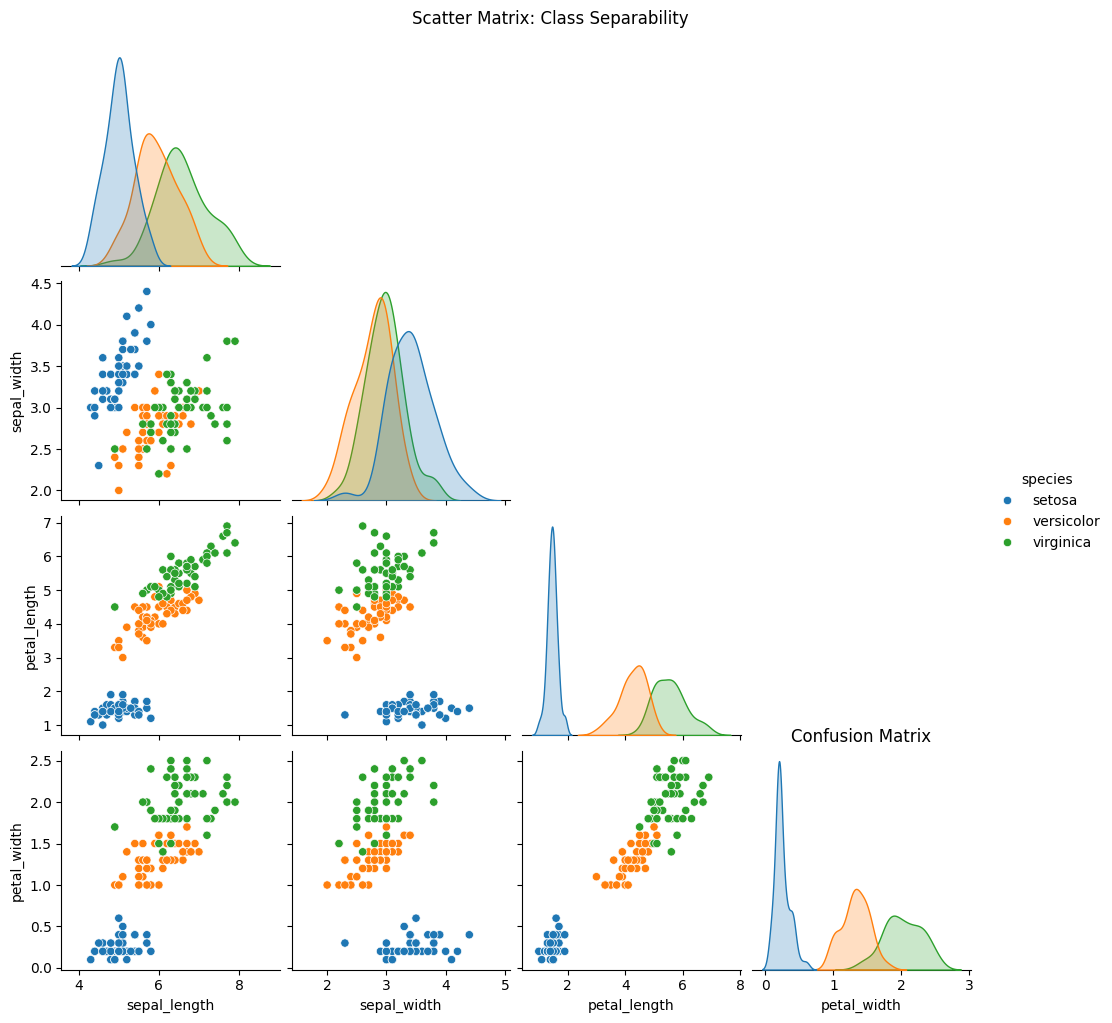

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv("../data/Iris.csv")

le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])

X = df.drop("species", axis = 1)
y = df["species"]

# added noise just to see how the model performs (without noise, accuracy score is 1.0)
np.random.seed(42)
noise = np.random.normal(0, 0.5, X.shape)  # mean 0, std 0.5 (you can control the noise by changing values)
X_noisy = X + noise


X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter = 200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Ac_S = accuracy_score(y_test, y_pred)
clas_report = classification_report(y_test, y_pred)
conf_mtrx = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels = le.classes_,  cmap = "Blues", )
#ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
df_plot = df.copy()
df_plot["species"] = le.inverse_transform(df_plot["species"])
sns.pairplot(df_plot, hue="species", corner=True, diag_kind="kde")
plt.suptitle("Scatter Matrix: Class Separability", y=1.02)

print("Accuracy Score: ", Ac_S)
print("Classification Report: \n", clas_report)
print("Confusion Matrix: \n", conf_mtrx)
plt.title("Confusion Matrix")
plt.show()


TITANIC DATASET !!!

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80        87
           1       0.69      0.64      0.67        56

    accuracy                           0.75       143
   macro avg       0.74      0.73      0.73       143
weighted avg       0.75      0.75      0.75       143

Accuracy Score:  0.7482517482517482
Confusion Matrix: 
 [[71 16]
 [20 36]]


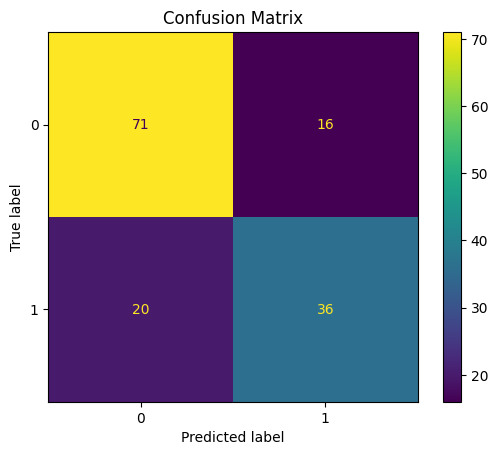

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("../data/Titanic-Dataset.csv")
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']].dropna()

#df = df[['Survived', 'Age', 'Fare', 'Sex', 'Embarked']].dropna()
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
#df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})

#X = df[['Survived', 'Age', 'Fare', 'Sex', 'Embarked']]      
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']]    # You can select any features which you think can help in predicting the target.
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report: \n", classification_report(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
plt.title("Confusion Matrix")
plt.show()



SCRATCH IMPLEMENTATION ( NO LIBRARIES!!)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
[0 1 2]
Multiclass Logistic Regression Accuracy:  0.9


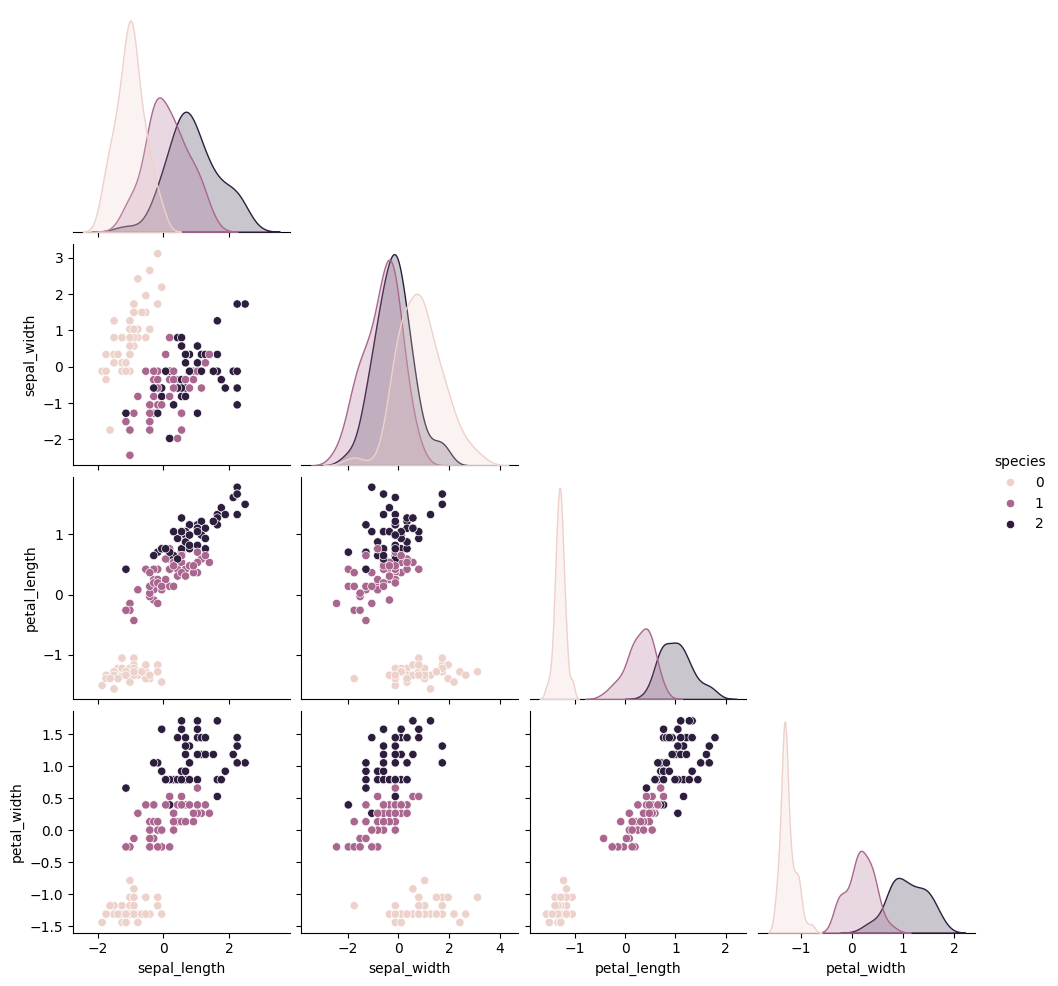

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("../data/Iris.csv")
print(df.head())

X = df.iloc[:, : -1].values 
y = df.iloc[:, -1].values 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(np.unique(y))

from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42)



X = (X-X.mean(axis=0))/ X.std(axis=0)


class LogisticRegressionScratch:
    def __init__(self, lr = 0.01, epochs = 5000):
        self.lr = lr
        self.epochs = epochs

    def sigmoid(self, z):
        return 1/ (1 + np.exp(-z))
    
    def fit(self, X, y):
        m,n = X.shape
        self.w = np.zeros(n)
        self.b = 0

        for _ in range(self.epochs):
            z = X @ self.w + self.b
            y_pred = self.sigmoid(z)
            error = y_pred - y
            dw = (1/m) * X.T @ error
            db = (1/m) * np.sum(error)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict_proba(self, X):
        return self.sigmoid( X @ self.w + self.b)
    
    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)
    
classes = np.unique(y)
models =[]

for c in classes:
    y_binary = (y == c).astype(int)
    model = LogisticRegressionScratch(lr = 0.01, epochs = 5000)
    model.fit(X, y_binary)
    models.append(model)

def multiclass_prediction(X, models):
    probs = np.array([model.predict_proba(X) for model in models])
    return np.argmax(probs, axis = 0)

y_pred = multiclass_prediction(X, models)
accuracy = np.mean(y_pred == y)
print("Multiclass Logistic Regression Accuracy: ", accuracy)

import seaborn as sns
df_plot = pd.DataFrame(X, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df_plot['species'] = y
sns.pairplot(df_plot, hue='species', corner=True)
plt.show()

        
    
    




with SOFTMAX !!

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("../data/Iris.csv")
X = df.iloc[:, : -1].values
y = df.iloc[:, -1].values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

X = (X - X.mean(axis = 0)) / X.std(axis = 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

n_samples, n_features = X_train.shape
n_classes = len(np.unique(y_train))

w = np.zeros((n_features, n_classes)) 
b = np.zeros(n_classes)

def Softmax(z):
    exp_z = np.exp(z- np.max(z, axis = 1, keepdims = True))
    return exp_z/np.sum(exp_z, axis = 1, keepdims = True)

lr = 0.1
epochs = 1000

for epoch in range(epochs):
    logits = X_train @ w + b
    probs = Softmax(logits)

    probs[range(n_samples), y_train] -= 1
    dw = (X_train.T @ probs)/ n_samples
    db = np.mean(probs, axis = 0)

    w -= lr * dw
    b -= lr * db

def predict(X):
    logits = X @ w + b
    probs = Softmax(logits)
    return np.argmax(probs, axis = 1)

y_predict_train = predict(X_train)
training_accuracy = np.mean(y_predict_train == y_train)
print("Train Accuracy: ", training_accuracy)
y_predict_test = predict(X_test)
test_accuracy = np.mean(y_predict_test == y_test)
print("Test Accuracy: ", test_accuracy)



Train Accuracy:  0.9666666666666667
Test Accuracy:  1.0
